<a href="https://colab.research.google.com/github/TaruSora/NLP_100knock/blob/main/100knock_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 問題50のコードをそのまま利用
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip
!sed -e 's/"/'\''/g' newsCorpora.csv > newsCorpora_re.csv

--2022-03-27 07:58:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  30.9MB/s    in 0.9s    

2022-03-27 07:58:51 (30.9 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

train, tmp = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['CATEGORY'])
valid, test = train_test_split(tmp, test_size=0.5, shuffle=True, random_state=42, stratify=tmp['CATEGORY'])

train.to_csv('train.txt', sep='\t', index=False)
valid.to_csv('valid.txt', sep='\t', index=False)
test.to_csv('test.txt', sep='\t', index=False)

print('学習用データ')
print(train['CATEGORY'].value_counts())
print('評価用データ')
print(valid['CATEGORY'].value_counts())
print('テスト用データ')
print(test['CATEGORY'].value_counts())

学習用データ
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
評価用データ
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
テスト用データ
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


70.問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

In [ ]:
import gdown
from gensim.models import KeyedVectors

# 学習済み単語ベクトルのダウンロード
url = "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=True)

# ダウンロードファイルのロード
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/100本ノック/第7章/GoogleNews-vectors-negative300.bin.gz', binary=True)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM 



In [ ]:
# 70 単語ベクトルの和による特徴量

import torch
import string
import re

def w2v(text):
    code_regex = re.compile('[!"#$%&\'\\\\()*+,-./:;<=>?@[\\]^_`{|}~「」〔〕“”〈〉『』【】＆＊・（）＄＃＠。、？！｀＋￥％]')
    text = code_regex.sub(' ', text) # textから記号を除去、半角スペースに変換
    words = text.split()
    vec = [model[word] for word in words if word in model]

    return torch.tensor(sum(vec)/len(vec))

def makeVec(input, features, labels):
    with open(input, 'r') as f:
        category_dict={'b': 0, 't': 1, 'e':2, 'm':3}
        df = pd.read_csv(input, sep='\t')
        
        X = torch.stack([w2v(text) for text in df['TITLE']])
        y = torch.tensor(df['CATEGORY'].map(category_dict))
        torch.save(X, features)
        torch.save(y, labels)
        return X,y

X_train, y_train = makeVec('train.txt', './drive/MyDrive/100本ノック/第8章/X_train.pt', './drive/MyDrive/100本ノック/第8章/y_train.pt')
X_valid, y_valid = makeVec('valid.txt', './drive/MyDrive/100本ノック/第8章/X_valid.pt', './drive/MyDrive/100本ノック/第8章/y_valid.pt')
X_test, y_test = makeVec('test.txt', './drive/MyDrive/100本ノック/第8章/y_test.pt', './drive/MyDrive/100本ノック/第8章/y_valid.pt')

In [ ]:
print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[-0.0295,  0.0653, -0.0597,  ..., -0.0425,  0.0027,  0.0337],
        [-0.0255,  0.0341,  0.0286,  ...,  0.0039,  0.0291, -0.0840],
        [ 0.0564, -0.0839, -0.1227,  ...,  0.0672,  0.1786, -0.1000],
        ...,
        [ 0.1737, -0.1069, -0.1205,  ..., -0.0406,  0.1069, -0.0029],
        [-0.0738, -0.0352, -0.0405,  ...,  0.0280,  0.0646,  0.0919],
        [ 0.0394,  0.0317,  0.0094,  ...,  0.0160,  0.0709,  0.0104]])


In [ ]:
print(y_train[:30])

tensor([0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 2])


71.問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

In [ ]:
# 71 単層ニューラルネットワークによる予測

from torch import nn

class singleNet(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.fc = nn.Linear(n_input, n_output, bias=False)
        nn.init.normal_(self.fc.weight, 0.0, 1.0) 

    def forward(self, x):
        x = self.fc(x)
        return x

model1 = singleNet(300, 4)
y_hat_1 = torch.softmax(model1(X_train[:1]), dim=-1)
print(y_hat_1)
y_hat = torch.softmax(model1.forward(X_train[:4]), dim=-1)
print(y_hat)

tensor([[0.4863, 0.0788, 0.0964, 0.3385]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4863, 0.0788, 0.0964, 0.3385],
        [0.2343, 0.5188, 0.0455, 0.2013],
        [0.2166, 0.0094, 0.1478, 0.6263],
        [0.4842, 0.0300, 0.0933, 0.3926]], grad_fn=<SoftmaxBackward0>)


72.学習データの事例x1と事例集合x1,x2,x3,x4に対して，クロスエントロピー損失と，行列Wに対する勾配を計算せよ．

In [ ]:
# 72 損失と勾配の計算

criterion = nn.CrossEntropyLoss() # 損失関数
l_1 = criterion(model1(X_train[:1]), y_train[:1]) # 事例x1の損失
model1.zero_grad() # 勾配を初期化
l_1.backward()
print(f'損失: {l_1:.4f}')
print(f'勾配:\n{model1.fc.weight.grad}')

l = criterion(model1(X_train[:4]), y_train[:4]) # 事例集合x1,x2,x3,x4の損失
model1.zero_grad()
l.backward()
print(f'損失: {l:.4f}')
print(f'勾配:\n{model1.fc.weight.grad}')

損失: 0.7209
勾配:
tensor([[ 0.0151, -0.0335,  0.0307,  ...,  0.0218, -0.0014, -0.0173],
        [-0.0023,  0.0051, -0.0047,  ..., -0.0034,  0.0002,  0.0027],
        [-0.0028,  0.0063, -0.0058,  ..., -0.0041,  0.0003,  0.0032],
        [-0.0100,  0.0221, -0.0202,  ..., -0.0144,  0.0009,  0.0114]])
損失: 1.5186
勾配:
tensor([[ 0.0125, -0.0022,  0.0335,  ..., -0.0165, -0.0420,  0.0405],
        [-0.0028,  0.0053,  0.0027,  ..., -0.0007,  0.0042, -0.0099],
        [-0.0267,  0.0058, -0.0193,  ...,  0.0165,  0.0091, -0.0209],
        [ 0.0171, -0.0089, -0.0169,  ...,  0.0006,  0.0287, -0.0096]])


73.確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列Wを学習せよ．

In [ ]:
# 73 確率的勾配降下法による学習

from torch.utils.data import TensorDataset, DataLoader

model2 = singleNet(300, 4)
batch_size=1

# Datasetの作成
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
test = TensorDataset(X_test, y_test)
# Dataloaderの作成
dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
dataloader_test = DataLoader(test, batch_size=batch_size, shuffle=False)

# 損失関数、オプティマイザ
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-1)

iteration = 100
for epoch in range(iteration):
    model2.train()
    loss_train = 0.0
    for i, (x, t) in enumerate(dataloader_train):
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model2(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()
        loss_train += loss
    loss_train=loss_train/i
    
    print(f'epoch: {epoch+1}, loss_train: {loss_train:.4f}')

epoch: 1, loss_train: 0.4654
epoch: 2, loss_train: 0.3193
epoch: 3, loss_train: 0.2899
epoch: 4, loss_train: 0.2746
epoch: 5, loss_train: 0.2642
epoch: 6, loss_train: 0.2573
epoch: 7, loss_train: 0.2513
epoch: 8, loss_train: 0.2473
epoch: 9, loss_train: 0.2441
epoch: 10, loss_train: 0.2404
epoch: 11, loss_train: 0.2381
epoch: 12, loss_train: 0.2369
epoch: 13, loss_train: 0.2347
epoch: 14, loss_train: 0.2334
epoch: 15, loss_train: 0.2314
epoch: 16, loss_train: 0.2301
epoch: 17, loss_train: 0.2292
epoch: 18, loss_train: 0.2275
epoch: 19, loss_train: 0.2284
epoch: 20, loss_train: 0.2270
epoch: 21, loss_train: 0.2253
epoch: 22, loss_train: 0.2252
epoch: 23, loss_train: 0.2251
epoch: 24, loss_train: 0.2243
epoch: 25, loss_train: 0.2234
epoch: 26, loss_train: 0.2233
epoch: 27, loss_train: 0.2227
epoch: 28, loss_train: 0.2218
epoch: 29, loss_train: 0.2216
epoch: 30, loss_train: 0.2216
epoch: 31, loss_train: 0.2207
epoch: 32, loss_train: 0.2214
epoch: 33, loss_train: 0.2201
epoch: 34, loss_tra

74.問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [ ]:
# 74 正解率の計測

def calc_acc(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

train_acc = calc_acc(model2, dataloader_train)
test_acc = calc_acc(model2, dataloader_test)
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

学習用データの正解率：0.9276
評価用データの正解率：0.9012


75.問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [ ]:
# 75 損失と正解率のプロット

import numpy as np
from matplotlib import pyplot as plt

# 74の関数で損失も計算できるように改変
def calc_acc_loss(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

model3 = singleNet(300, 4)
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-1)

iteration = 100
train_log = []
valid_log = []
for epoch in range(iteration):
    model3.train()
    for i, (x, t) in enumerate(dataloader_train):
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model3(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model3, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model3, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    print(f'epoch: {epoch+1}, train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f},')


epoch: 1, train_acc: 0.8885, train_loss: 0.3304,
epoch: 2, train_acc: 0.9023, train_loss: 0.2889,
epoch: 3, train_acc: 0.9112, train_loss: 0.2683,
epoch: 4, train_acc: 0.9123, train_loss: 0.2576,
epoch: 5, train_acc: 0.9160, train_loss: 0.2494,
epoch: 6, train_acc: 0.9193, train_loss: 0.2437,
epoch: 7, train_acc: 0.9184, train_loss: 0.2410,
epoch: 8, train_acc: 0.9202, train_loss: 0.2357,
epoch: 9, train_acc: 0.9216, train_loss: 0.2333,
epoch: 10, train_acc: 0.9239, train_loss: 0.2307,
epoch: 11, train_acc: 0.9240, train_loss: 0.2287,
epoch: 12, train_acc: 0.9252, train_loss: 0.2258,
epoch: 13, train_acc: 0.9244, train_loss: 0.2247,
epoch: 14, train_acc: 0.9245, train_loss: 0.2234,
epoch: 15, train_acc: 0.9222, train_loss: 0.2254,
epoch: 16, train_acc: 0.9239, train_loss: 0.2218,
epoch: 17, train_acc: 0.9248, train_loss: 0.2212,
epoch: 18, train_acc: 0.9259, train_loss: 0.2203,
epoch: 19, train_acc: 0.9245, train_loss: 0.2188,
epoch: 20, train_acc: 0.9246, train_loss: 0.2197,
epoch: 21

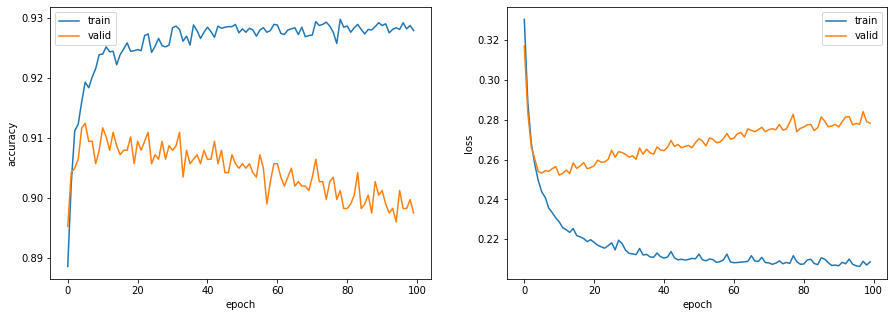

In [ ]:
import numpy as np

figure, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(train_log).T[0], label='train')
ax[0].plot(np.array(valid_log).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend()
ax[1].plot(np.array(train_log).T[1], label='train')
ax[1].plot(np.array(valid_log).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend()
plt.show()

76.問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [ ]:
# 76 チェックポイント

model4 = singleNet(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=1e-1)

iteration = 30
train_log = []
valid_log = []
for epoch in range(iteration):
    model4.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model4(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model4, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model4, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model4.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    print(f'epoch: {epoch+1}, train_acc: {train_acc:.4f}, train_loss: {train_loss:.4f},')

epoch: 1, train_acc: 0.8827, train_loss: 0.3405,
epoch: 2, train_acc: 0.8992, train_loss: 0.2924,
epoch: 3, train_acc: 0.9078, train_loss: 0.2724,
epoch: 4, train_acc: 0.9081, train_loss: 0.2613,
epoch: 5, train_acc: 0.9154, train_loss: 0.2496,
epoch: 6, train_acc: 0.9181, train_loss: 0.2441,
epoch: 7, train_acc: 0.9166, train_loss: 0.2425,
epoch: 8, train_acc: 0.9203, train_loss: 0.2395,
epoch: 9, train_acc: 0.9203, train_loss: 0.2342,
epoch: 10, train_acc: 0.9232, train_loss: 0.2308,
epoch: 11, train_acc: 0.9230, train_loss: 0.2286,
epoch: 12, train_acc: 0.9238, train_loss: 0.2263,
epoch: 13, train_acc: 0.9204, train_loss: 0.2282,
epoch: 14, train_acc: 0.9226, train_loss: 0.2249,
epoch: 15, train_acc: 0.9215, train_loss: 0.2256,
epoch: 16, train_acc: 0.9227, train_loss: 0.2249,
epoch: 17, train_acc: 0.9250, train_loss: 0.2201,
epoch: 18, train_acc: 0.9258, train_loss: 0.2213,
epoch: 19, train_acc: 0.9262, train_loss: 0.2191,
epoch: 20, train_acc: 0.9240, train_loss: 0.2189,
epoch: 21

77.問題76のコードを改変し，B事例ごとに損失・勾配を計算し，行列Wの値を更新せよ（ミニバッチ化）．Bの値を1,2,4,8,…と変化させながら，1エポックの学習に要する時間を比較せよ．

In [ ]:
# 77 ミニバッチ化

def model_function(train, valid, model, batch_size):
    import time
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    train_log = []
    valid_log = []

    # 時間の計測
    start = time.time()

    # 1エポックの学習時間を比較するためループは回さない
    model.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model, dataloader_train)
    valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
    
    end = time.time()
    time = end - start

    return train_acc, train_loss, time

In [ ]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model5 = singleNet(300, 4)

for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    print(f'バッチサイズ：{i}')
    acc, loss, time = model_function(train, valid, model5, i)
    print(f'train_acc: {acc:.4f}, train_loss: {loss:.4f}, time: {time:.4f} sec')

バッチサイズ：1
train_acc: 0.8868, train_loss: 0.3341, time: 6.9487 sec
バッチサイズ：2
train_acc: 0.8965, train_loss: 0.3046, time: 3.6819 sec
バッチサイズ：4
train_acc: 0.9004, train_loss: 0.2959, time: 1.9266 sec
バッチサイズ：8
train_acc: 0.9020, train_loss: 0.2918, time: 1.0560 sec
バッチサイズ：16
train_acc: 0.9032, train_loss: 0.2900, time: 0.6161 sec
バッチサイズ：32
train_acc: 0.9037, train_loss: 0.2891, time: 0.3645 sec
バッチサイズ：64
train_acc: 0.9038, train_loss: 0.2886, time: 0.2782 sec
バッチサイズ：128
train_acc: 0.9041, train_loss: 0.2877, time: 0.2045 sec
バッチサイズ：256
train_acc: 0.9042, train_loss: 0.2885, time: 0.1908 sec
バッチサイズ：512
train_acc: 0.9042, train_loss: 0.2883, time: 0.1678 sec


78.問題77のコードを改変し，GPU上で学習を実行せよ.

In [ ]:
# 78 GPU上での学習

# 75の関数を改変
def calc_acc_loss(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

# 77の関数を改変
def model_function(train, valid, model, batch_size, device):
    import time
    model.to(device)
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    train_log = []
    valid_log = []

    # 時間の計測
    start = time.time()

    # 1エポックの学習時間を比較するためループは回さない
    model.train()
    train_loss = 0.0
    for x, t in dataloader_train:
        # データをGPUへ転送
        x = x.to(device)
        t = t.to(device)
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播→誤差逆伝播→重み更新
        y = model(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

    train_acc, train_loss = calc_acc_loss(model, dataloader_train, device)
    valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid, device)
    train_log.append([train_acc, train_loss])
    valid_log.append([valid_acc, valid_loss])

    # チェックポイント保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
    
    end = time.time()
    time = end - start

    return train_acc, train_loss, time

In [ ]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model6 = singleNet(300, 4)
device = torch.device('cuda:0')

for batch_size in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    print(f'バッチサイズ：{batch_size}')
    acc, loss, time = model_function(train, valid, model6, batch_size, device)
    print(f'train_acc: {acc:.4f}, train_loss: {loss:.4f}, time: {time:.4f} sec')

バッチサイズ：1
train_acc: 0.8825, train_loss: 0.3329, time: 15.1700 sec
バッチサイズ：2
train_acc: 0.8959, train_loss: 0.3046, time: 7.5577 sec
バッチサイズ：4
train_acc: 0.8982, train_loss: 0.2952, time: 3.8745 sec
バッチサイズ：8
train_acc: 0.9004, train_loss: 0.2916, time: 1.9965 sec
バッチサイズ：16
train_acc: 0.9013, train_loss: 0.2898, time: 1.0770 sec
バッチサイズ：32
train_acc: 0.9007, train_loss: 0.2886, time: 0.6288 sec
バッチサイズ：64
train_acc: 0.9008, train_loss: 0.2883, time: 0.3842 sec
バッチサイズ：128
train_acc: 0.9005, train_loss: 0.2890, time: 0.2592 sec
バッチサイズ：256
train_acc: 0.9005, train_loss: 0.2879, time: 0.2076 sec
バッチサイズ：512
train_acc: 0.9005, train_loss: 0.2879, time: 0.1720 sec


79.問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．


In [ ]:
# 79 多層ニューラルネットワーク

import torch.nn.functional as F

class multiNet(nn.Module):
    def __init__(self, n_input, n_mid, n_output, n_layer):
        super().__init__()
        self.n_layer = n_layer
        self.fc_in = nn.Linear(n_input, n_mid)
        self.fc_mid = nn.Linear(n_mid, n_mid)
        self.fc_out = nn.Linear(n_mid, n_output)
        self.bn = nn.BatchNorm1d(n_mid)
    def forward(self, x):
        x = F.relu(self.fc_in(x))
        for _ in range(self.n_layer):
            x = F.relu(self.bn(self.fc_mid(x)))
        x = F.relu(self.fc_out(x))

        return x

In [ ]:
# 78の関数
def calc_acc_loss(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    loss = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            loss += criterion(y, t)
            total += len(x)
            correct += (pred == t).sum().item()
    
    acc = correct/total
    loss1 = loss/len(dataloader)
    return acc, loss1

# 78の関数を改変
def model_function(train, valid, model, batch_size, device, epochs):
    import time
    from torch import optim
    model.to(device)
    dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(valid, batch_size=len(valid), shuffle=False)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs, eta_min=1e-5, last_epoch=-1)

    train_log = []
    valid_log = []
    for epoch in range(epochs):
        # 時間の計測
        start = time.time()

        model.train()
        train_loss = 0.0
        for x, t in dataloader_train:
            # データをGPUへ転送
            x = x.to(device)
            t = t.to(device)
            # 勾配の初期化
            optimizer.zero_grad()
            # 順伝播→誤差逆伝播→重み更新
            y = model.forward(x)
            loss = criterion(y, t)
            loss.backward()
            optimizer.step()

        train_acc, train_loss = calc_acc_loss(model, dataloader_train, device)
        valid_acc, valid_loss = calc_acc_loss(model, dataloader_valid, device)
        train_log.append([train_acc, train_loss])
        valid_log.append([valid_acc, valid_loss])

        # チェックポイント保存
        torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')
        
        end = time.time()
        timeval = end - start
        
        print(f'epoch: {epoch + 1}, loss_train: {train_loss}, accuracy_train: {train_acc}, loss_valid: {valid_loss}, accuracy_valid: {valid_acc}, {time}sec')

        # 3エポック連続で損失が減らなかった場合学習終了
        if epoch > 2 and valid_log[epoch-3][0] <= valid_log[epoch-2][0] <= valid_log[epoch-1][0] <= valid_log[epoch][0]:
            break

        scheduler.step()

    return {'train': train_log, 'valid': valid_log}

In [ ]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
model7 = multiNet(300, 200, 4, 1)

device = torch.device('cuda:0')

log = model_function(train, valid, model7, 64, device, 1000)

epoch: 1, loss_train: 0.23426881432533264, accuracy_train: 0.9238113066267316, loss_valid: 0.2582070231437683, accuracy_valid: 0.9124251497005988, <module 'time' (built-in)>sec
epoch: 2, loss_train: 0.19794544577598572, accuracy_train: 0.9327031074503931, loss_valid: 0.2567870020866394, accuracy_valid: 0.9049401197604791, <module 'time' (built-in)>sec
epoch: 3, loss_train: 0.16973043978214264, accuracy_train: 0.943373268438787, loss_valid: 0.2476508766412735, accuracy_valid: 0.9124251497005988, <module 'time' (built-in)>sec
epoch: 4, loss_train: 0.16070610284805298, accuracy_train: 0.9441220516660427, loss_valid: 0.2671181261539459, accuracy_valid: 0.9131736526946108, <module 'time' (built-in)>sec
epoch: 5, loss_train: 0.13627775013446808, accuracy_train: 0.9587233245975291, loss_valid: 0.26359549164772034, accuracy_valid: 0.9079341317365269, <module 'time' (built-in)>sec
epoch: 6, loss_train: 0.09287526458501816, accuracy_train: 0.9731374017222014, loss_valid: 0.25569677352905273, acc

In [ ]:
# 正解率の計算

def calc_acc_single(model, dataloader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

def calc_acc_multi(model, dataloader, device):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device)
            y = model(x)
            pred = torch.argmax(y, dim=-1)
            total += len(x)
            correct += (pred == t).sum().item()
    acc = correct/total
    return acc

train_acc = calc_acc_single(model2, dataloader_train)
test_acc = calc_acc_single(model2, dataloader_test)
print('単層ネットワーク')
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

dataloader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
dataloader_valid = DataLoader(valid, batch_size=len(valid), shuffle=False)

train_acc = calc_acc_multi(model7, dataloader_train, device)
test_acc = calc_acc_multi(model7, dataloader_test, device)
print('\n多層ネットワーク')
print(f'学習用データの正解率：{train_acc:.4f}')
print(f'評価用データの正解率：{test_acc:.4f}')

単層ネットワーク
学習用データの正解率：0.9276
評価用データの正解率：0.9012

多層ネットワーク
学習用データの正解率：0.9992
評価用データの正解率：0.9184
